In [1]:
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#读取100/testPredict.npy
testPredict = np.load('./testPredict.npy')
testY = np.load('./testY.npy')
print(testPredict.shape)
print(testY.shape)
#反归一化
data_min = 1.3
data_max = 674.5
testPredict = testPredict * (data_max - data_min) + data_min
testY= testY * (data_max - data_min) + data_min


(1311, 71, 73, 1)
(1311, 71, 73, 1)


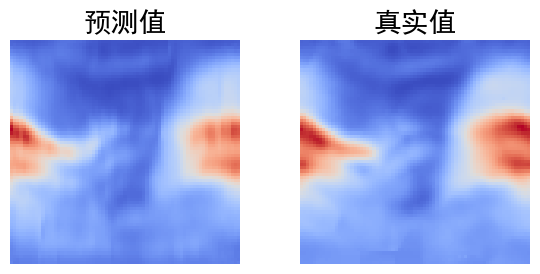

In [24]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.subplot(1, 2, 1)
plt.imshow(testPredict[1000,:,:,:], cmap='coolwarm', interpolation='nearest')
plt.title('预测值', fontsize=20)
#取消坐标轴
plt.axis('off')
# 绘制第二张热力图
plt.subplot(1, 2, 2)
plt.imshow(testY[1000,:,:,:], cmap='coolwarm', interpolation='nearest')
#取消坐标轴 
plt.axis('off') 
plt.title('真实值', fontsize=20)
plt.tight_layout()
plt.show()

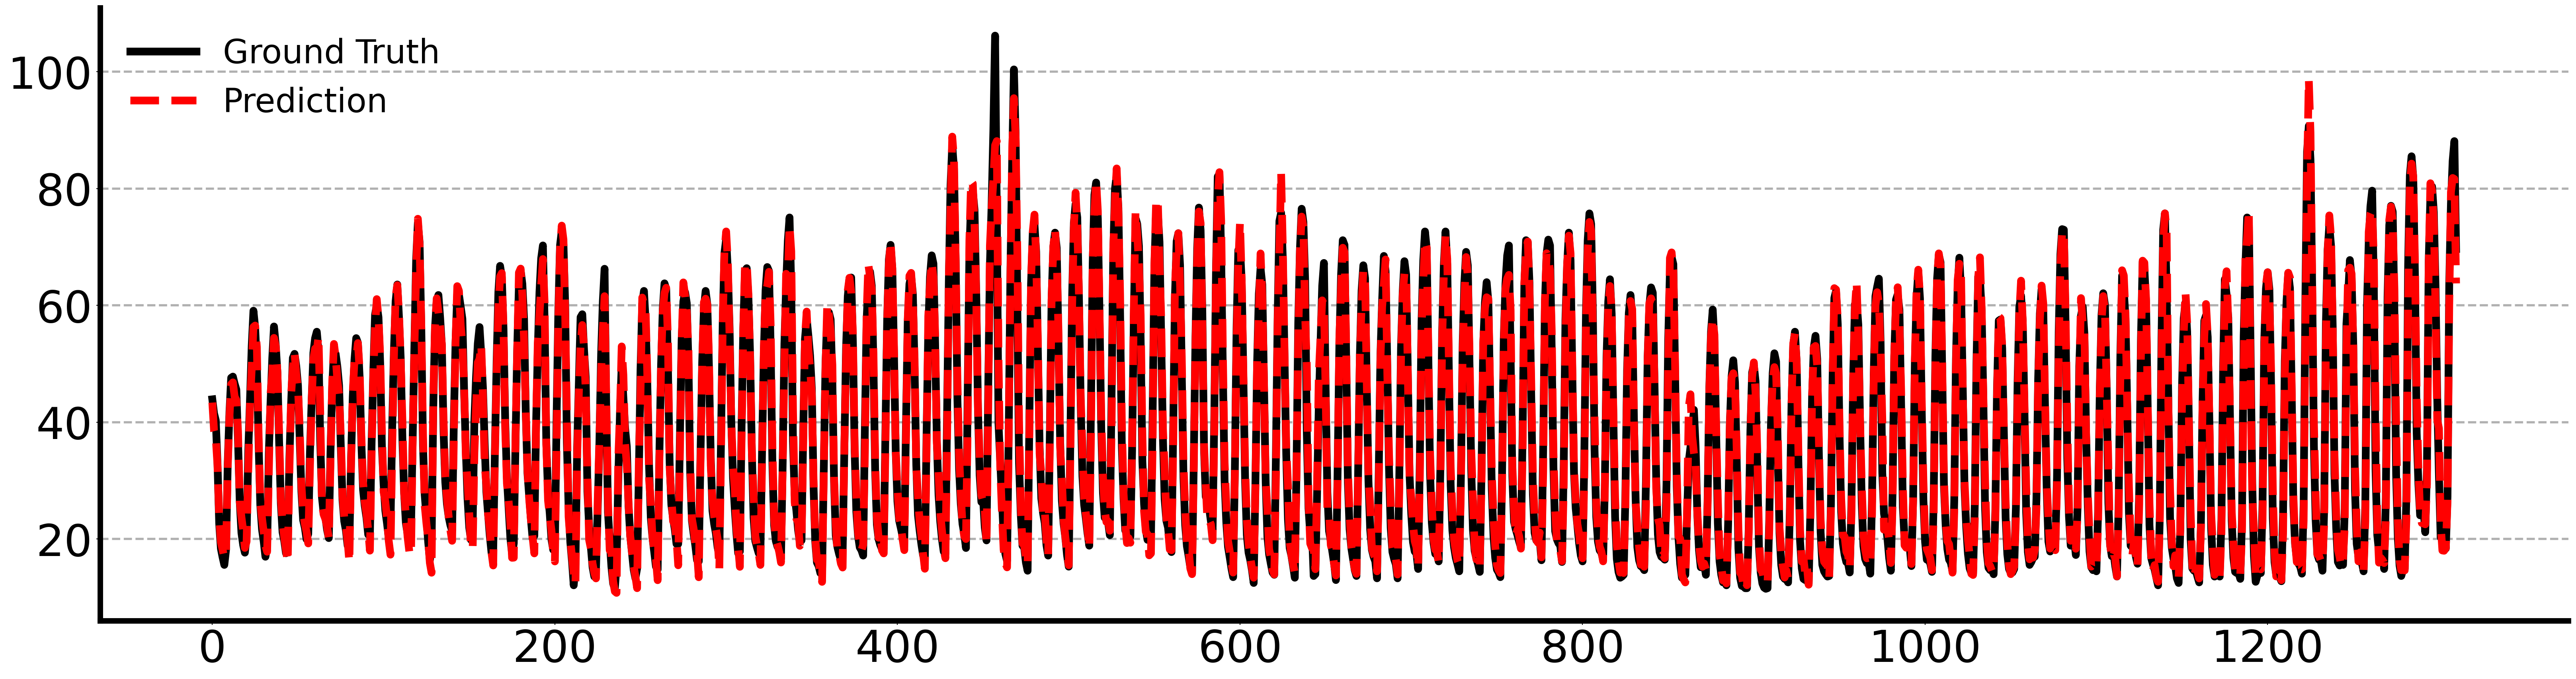

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch
#plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 40
plt.rcParams['axes.linewidth'] = 5
# 可视化绘制
fig, ax = plt.subplots(figsize=(40,10),dpi=200)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.plot(testY[:,20,20,:],'black',label='Ground Truth',linewidth=7)
ax.plot(testPredict[:,20,20,:],'red',linestyle='--',label='Prediction',linewidth=7)
ax.legend(fontsize=30,loc='upper left',frameon=False)
#横线网格
ax.grid(axis='y',linestyle='--',linewidth=2)

In [6]:
testY=testY.reshape(-1,1)
testPredict=testPredict.reshape(-1,1)

In [7]:
from  sklearn import  metrics
import numpy as np

def GetRMSE(y_hat,y_test):
    sum = np.sqrt(metrics.mean_squared_error(y_test, y_hat))
    return  sum

def GetMAE(y_hat,y_test):
    sum = metrics.mean_absolute_error(y_test, y_hat)
    return  sum

def GetMAPE_Order(y_hat,y_test):
    #删除test_y 为0元素
    zero_index = np.where(y_test == 0)
    y_hat = np.delete(y_hat,zero_index[0])
    y_test = np.delete(y_test,zero_index[0])
    sum = np.mean(np.abs((y_hat - y_test) / y_test)) * 100
    return sum
#计算R2
def GetR2(y_hat,y_test):
    sum = metrics.r2_score(y_test, y_hat)
    return sum



print("RMSE为",GetRMSE(testPredict,testY))
print("MAE为",GetMAE(testPredict,testY))
print("MAPE为",GetMAPE_Order(testPredict,testY))
print("R2为",GetR2(testPredict,testY))

RMSE为 3.7775009
MAE为 2.5973673
MAPE为 7.053257524967194
R2为 0.9807574577837609
